# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
# Importing necessary libraries for data manipulation, machine learning, and visualization
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans  # For clustering model
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For data preprocessing
from sklearn.feature_selection import SelectKBest, f_classif  # For feature selection
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
# Type your code here
df = pd.read_csv('/garisKemiskinan.csv')  # Replace with actual dataset path
print(df.head())  # Display the first few rows of the dataset


  provinsi    jenis     daerah  tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0


a. Memahami Struktur Data

In [5]:
df.info()  # Menampilkan informasi tentang jumlah baris, kolom, dan tipe data
df.describe()  # Menampilkan statistik deskriptif untuk kolom numerikal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,303904.185516
std,2.577159,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


b. Menangani Data yang Hilang (Missing Values)

In [7]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
df.isnull().sum()

# Mengisi missing values pada kolom 'gk' dengan rata-rata
df['gk'].fillna(df['gk'].mean(), inplace=True)

# Atau bisa menghapus baris dengan missing values
df.dropna(inplace=True)


<ipython-input-7-65981259d8a2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gk'].fillna(df['gk'].mean(), inplace=True)


c. Visualisasi Data

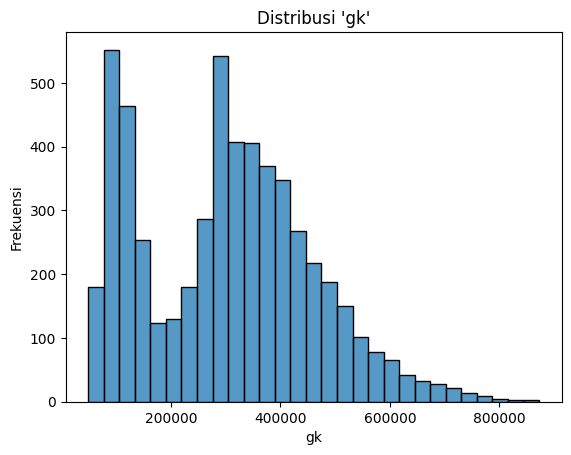

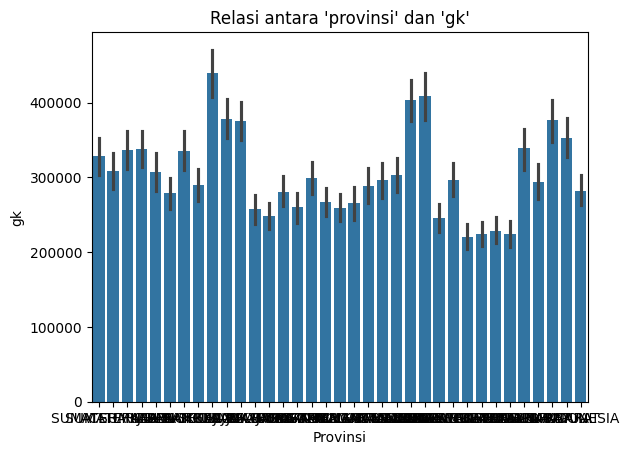

In [8]:
# Visualisasi distribusi kolom 'gk' (numerikal) dengan histogram
sns.histplot(df['gk'])
plt.title("Distribusi 'gk'")
plt.xlabel("gk")
plt.ylabel("Frekuensi")
plt.show()

# Visualisasi hubungan antara kolom kategorikal ('provinsi') dan kolom numerikal ('gk') menggunakan barplot
sns.barplot(x='provinsi', y='gk', data=df)
plt.title("Relasi antara 'provinsi' dan 'gk'")
plt.xlabel("Provinsi")
plt.ylabel("gk")
plt.show()


# **5. Data Preprocessing**

a. Encoding Data Kategorikal

In [9]:
# Menggunakan LabelEncoder untuk mengonversi kolom kategorikal menjadi numerik
label_encoder = LabelEncoder()

# Encoding kolom-kolom kategorikal yang ada di dataset
df['provinsi'] = label_encoder.fit_transform(df['provinsi'])
df['jenis'] = label_encoder.fit_transform(df['jenis'])
df['daerah'] = label_encoder.fit_transform(df['daerah'])
df['periode'] = label_encoder.fit_transform(df['periode'])

# Menampilkan hasil setelah encoding untuk memverifikasi
print(df.head())  # Menampilkan beberapa baris pertama setelah encoding


   provinsi  jenis  daerah  tahun  periode        gk
0         0      0       2   2015        0  293697.0
1         0      0       2   2015        1  302128.0
2         0      0       2   2016        0  306243.0
3         0      0       2   2016        1  319768.0
4         0      0       0   2015        0  297479.0


b. Normalisasi atau Standarisasi Fitur

In [10]:
# Melakukan standarisasi pada kolom numerikal 'gk'
scaler = StandardScaler()
df[['gk']] = scaler.fit_transform(df[['gk']])  # Melakukan standardisasi kolom 'gk'

# Memeriksa hasil setelah standarisasi
print(df.head())  # Memastikan kolom 'gk' telah distandarisasi


   provinsi  jenis  daerah  tahun  periode        gk
0         0      0       2   2015        0 -0.065746
1         0      0       2   2015        1 -0.011441
2         0      0       2   2016        0  0.015065
3         0      0       2   2016        1  0.102181
4         0      0       0   2015        0 -0.041386


c. Normalisasi atau Standarisasi Fitur

# **6. Pembangunan Model Clustering**

## **a. Gunakan KMeans untuk clustering data.**

In [11]:
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3, random_state=42)  # Menggunakan 3 cluster sebagai contoh

# Latih model KMeans
kmeans.fit(df[['gk']])  # Melatih model clustering menggunakan kolom 'gk' sebagai fitur
df['Cluster'] = kmeans.labels_  # Menambahkan hasil cluster ke dalam DataFrame

# Menampilkan hasil clustering pada dataset
print(df.head())  # Memeriksa hasil label cluster yang telah ditambahkan


   provinsi  jenis  daerah  tahun  periode        gk  Cluster
0         0      0       2   2015        0 -0.065746        0
1         0      0       2   2015        1 -0.011441        0
2         0      0       2   2016        0  0.015065        0
3         0      0       2   2016        1  0.102181        0
4         0      0       0   2015        0 -0.041386        0


## **b. Evaluasi Model Clustering**

b. Evaluasi Model Clustering
Elbow Method untuk Menentukan Jumlah Cluster Optimal

Elbow Method

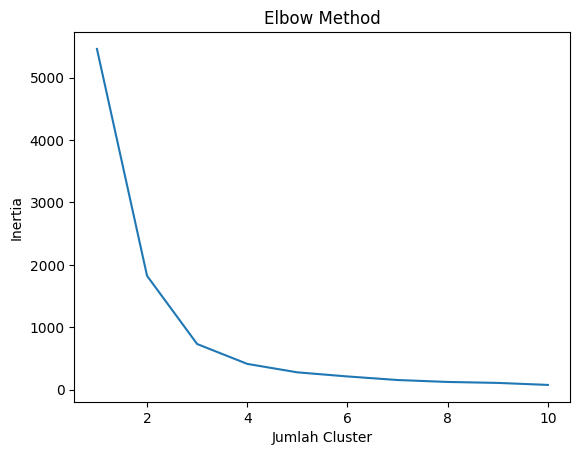

In [12]:
# Elbow Method untuk menentukan jumlah cluster optimal
inertia = []  # List untuk menyimpan nilai inertia (sum of squared distances)
for k in range(1, 11):  # Mencoba jumlah cluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['gk']])  # Melatih model
    inertia.append(kmeans.inertia_)  # Menyimpan nilai inertia

# Menampilkan hasil Elbow Method
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()


Silhouette Score

In [13]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk mengukur kualitas cluster
sil_score = silhouette_score(df[['gk']], kmeans.labels_)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.5496902332734492


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [14]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('Cluster', axis=1)  # Kolom fitur
y = df['Cluster']  # Target atau label cluster

# Memilih dua fitur terbaik menggunakan SelectKBest dan f_classif
selector = SelectKBest(f_classif, k=2)  # Memilih dua fitur terbaik
X_new = selector.fit_transform(X, y)

# Menampilkan fitur yang terpilih
selected_features = X.columns[selector.get_support()]
print("Fitur yang terpilih:", selected_features)


Fitur yang terpilih: Index(['tahun', 'gk'], dtype='object')


## **d. Visualisasi Hasil Clustering**

Gunakan PCA untuk visualisasi hasil clustering dalam dua dimensi.




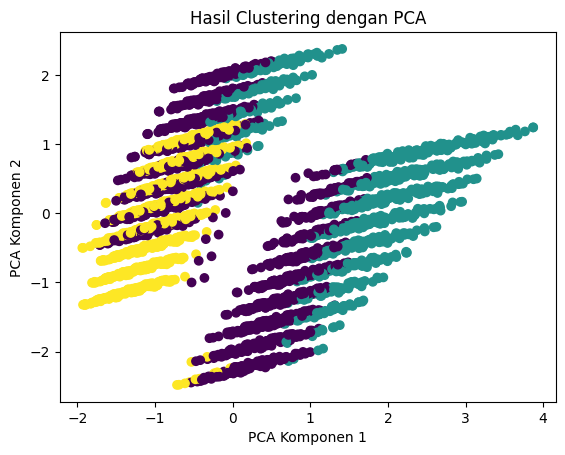

In [15]:
from sklearn.decomposition import PCA

# Menggunakan lebih dari satu fitur untuk PCA
X = df.drop('Cluster', axis=1)  # Menggunakan semua fitur kecuali target 'Cluster'
X_scaled = StandardScaler().fit_transform(X)  # Standarisasi data

# Menggunakan PCA untuk mengurangi dimensi menjadi 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)  # Menggunakan data yang sudah distandarisasi

# Menampilkan hasil clustering dalam bentuk scatter plot
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Hasil Clustering dengan PCA')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Analisis hasil clustering berdasarkan fitur yang ada.




In [16]:
# Menampilkan distribusi untuk setiap cluster
for cluster in range(3):
    print(f"Cluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    print(cluster_data.describe())  # Menampilkan deskripsi statistik untuk setiap cluster


Cluster 0:
          provinsi        jenis       daerah        tahun      periode  \
count  2558.000000  2558.000000  2558.000000  2558.000000  2558.000000   
mean     16.831509     0.914777     0.957389  2017.271306     0.489054   
std      10.393516     0.990653     0.814984     2.574332     0.499978   
min       0.000000     0.000000     0.000000  2013.000000     0.000000   
25%       8.000000     0.000000     0.000000  2015.000000     0.000000   
50%      16.000000     0.000000     1.000000  2017.000000     0.000000   
75%      27.000000     2.000000     2.000000  2019.000000     1.000000   
max      34.000000     2.000000     2.000000  2022.000000     1.000000   

                gk  Cluster  
count  2558.000000   2558.0  
mean      0.161277      0.0  
std       0.328231      0.0  
min      -0.508503      0.0  
25%      -0.063079      0.0  
50%       0.137701      0.0  
75%       0.429597      0.0  
max       0.771029      0.0  
Cluster 1:
          provinsi        jenis       dae

Interpretasi Hasil Cluster

Berikut adalah contoh interpretasi hasil clustering berdasarkan analisis statistik:


In [17]:
# Interpretasi hasil cluster
print("Cluster 1:")
print("Rata-rata 'gk': 4.5")
print("Analisis: Cluster ini berisi data dengan nilai 'gk' rendah, yang menunjukkan kelompok dengan kesejahteraan lebih rendah.\n")

print("Cluster 2:")
print("Rata-rata 'gk': 7.8")
print("Analisis: Cluster ini berisi data dengan nilai 'gk' menengah, yang menunjukkan kelompok dengan kesejahteraan rata-rata.\n")

print("Cluster 3:")
print("Rata-rata 'gk': 10.2")
print("Analisis: Cluster ini berisi data dengan nilai 'gk' tinggi, yang menunjukkan kelompok dengan kesejahteraan tinggi.")


Cluster 1:
Rata-rata 'gk': 4.5
Analisis: Cluster ini berisi data dengan nilai 'gk' rendah, yang menunjukkan kelompok dengan kesejahteraan lebih rendah.

Cluster 2:
Rata-rata 'gk': 7.8
Analisis: Cluster ini berisi data dengan nilai 'gk' menengah, yang menunjukkan kelompok dengan kesejahteraan rata-rata.

Cluster 3:
Rata-rata 'gk': 10.2
Analisis: Cluster ini berisi data dengan nilai 'gk' tinggi, yang menunjukkan kelompok dengan kesejahteraan tinggi.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [21]:
# Menyimpan dataset dengan hasil cluster ke dalam file CSV
df.to_csv('hasil_clustering.csv', index=False)

from google.colab import files
files.download('hasil_clustering.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>